# 🏃🔎 2. Exploratory Data Analysis and Preparing Data for Modeling

*Master in Data Science and Big Data*

*Author: Marcos Jiménez Juliana*

*Master's Thesis*

<a id = id_0><a/>

# Index

1. [Importing Data from PostgreSQL Datawarehouse](#part_1)
2. [Exploratory Data Analysis (EDA)](#eda)
   1. [Univariate Data Distribution](#univariate)
   3. [Target Variable Distribution (VO2Max)](#vo2max)
   4. [Multivariate Relationships](#multivariate)
   5. [Linear Dimensionality Reduction (PCA)](#pca)
   6. [Non-linear Dimensionality Reduction (t-SNE)](#tsne)
   7. [Clustering Analysis (DBSCAN)](#clustering)

<a id = part_1><a/>
## 1. Importing Data from PostgreSQL Data Warehouse

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The src folder is added to Python's search path
sys.path.append(os.path.abspath("../src"))

# My functions
import eda

First of all, the data previously stored in the DataWarehouse NHANES database in the table called `biometrics` is imported using Python's `SQLAlchemy` library. 

In [3]:
from dotenv import load_dotenv, find_dotenv
from sqlalchemy import create_engine


# This earch for the nearest .env upwards in the folder tree
load_dotenv(find_dotenv())

# Retreive your credentials
user=os.getenv("DB_USER")
password=os.getenv("DB_PASSWORD")
host=os.getenv("DB_HOST")
port=os.getenv("DB_PORT")
database=os.getenv("DB_NAME")

# SQL Alchemy engine
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')

# SQL Query 
sql = "SELECT * FROM biometrics;"

# storing the data into a pandas df
df = pd.read_sql_query(sql, engine)
df.head()

id  cohort   age  gender  ethnic_group  poverty_ratio  family_income  \
0   5.0     1.0  49.0     1.0           3.0           5.00             11   
1   6.0     1.0  19.0     0.0           5.0           1.21              3   
2  11.0     1.0  15.0     1.0           3.0           1.25              6   
3  15.0     1.0  38.0     0.0           3.0           4.52              8   
4  21.0     1.0  18.0     1.0           1.0           1.80              6   

   education_level  health_insurance  smoker  ...  weight_diff  weight  \
0                2                 1     yes  ...     6.350301    92.5   
1                2                 1  former  ...     7.711079    59.2   
2                0                 1  former  ...     0.000000    65.0   
3                2                 1     yes  ...     4.535929    81.6   
4                1                 0      no  ...   -11.339823   112.9   

   height  cholesterol  red_blood_cell_count  hemoglobin  hematocrit  \
0   178.3        279.0                  5.13        14.5        43.6   
1   162.0        153.0                  4.22        13.1        38.7   
2   171.9        132.0                  5.55        16.3        48.3   
3   174.9        199.0                  4.14        13.3        40.2   
4   168.5        161.0                  5.36        16.4        46.8   

   mean_cell_hemoglobin  red_cell_distribution_width  vo2max  
0                  28.3                         13.1   40.03  
1                  30.9                         12.8   35.48  
2                  29.4                         11.8   58.85  
3                  32.1                         11.9   37.60  
4                  30.6                         12.5   37.36  

[5 rows x 27 columns]

- Alternatively, the data can be obtained from the cleaned `biometrics.csv` file in the repository:

In [4]:
# Uncomment if neccesary
#df = pd.read_csv('../data/processed/biometrics.csv')
#df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8324 entries, 0 to 8323
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8324 non-null   float64
 1   cohort                       8324 non-null   float64
 2   age                          8324 non-null   float64
 3   gender                       8324 non-null   float64
 4   ethnic_group                 8324 non-null   float64
 5   poverty_ratio                8324 non-null   float64
 6   family_income                8324 non-null   int64  
 7   education_level              8324 non-null   int64  
 8   health_insurance             8324 non-null   int64  
 9   smoker                       8324 non-null   object 
 10  physical_activity_time       8324 non-null   float64
 11  systolic_bp                  8324 non-null   float64
 12  diastolic_bp                 8324 non-null   float64
 13  pulse_rate        

In [6]:
df.describe().transpose()

count          mean          std           min  \
id                           8324.0  15888.160980  8966.243604  5.000000e+00   
cohort                       8324.0      2.029793     0.802691  1.000000e+00   
age                          8324.0     22.456151    10.385105  1.200000e+01   
gender                       8324.0      0.517900     0.499710  0.000000e+00   
ethnic_group                 8324.0      2.663023     1.268751  1.000000e+00   
poverty_ratio                8324.0      2.320385     1.559402  5.397605e-79   
family_income                8324.0      6.423715     3.057198  1.000000e+00   
education_level              8324.0      0.626141     0.846685  0.000000e+00   
health_insurance             8324.0      0.753844     0.430796  0.000000e+00   
physical_activity_time       8324.0   3078.455286  3970.569434  0.000000e+00   
systolic_bp                  8324.0    113.101442    11.488572  7.200000e+01   
diastolic_bp                 8324.0     64.845699    12.174794  5.397605e-79   
pulse_rate                   8324.0     72.960356    11.115803  3.800000e+01   
bmi                          8324.0     25.098640     5.977764  1.370000e+01   
waist_perimeter              8324.0     85.355031    15.246146  4.710000e+01   
body_fat_percent             8324.0     29.826461    10.488997  2.100000e+00   
weight_diff                  8324.0      1.091914     5.694107 -5.896708e+01   
weight                       8324.0     70.663667    19.568241  2.590000e+01   
height                       8324.0    167.203532    10.169326  1.330000e+02   
cholesterol                  8324.0    173.602235    36.565055  7.100000e+01   
red_blood_cell_count         8324.0      4.809916     0.468538  2.860000e+00   
hemoglobin                   8324.0     14.320106     1.424614  6.600000e+00   
hematocrit                   8324.0     42.308340     4.158459  2.280000e+01   
mean_cell_hemoglobin         8324.0     29.823606     1.969606  1.700000e+01   
red_cell_distribution_width  8324.0     12.508554     0.958759  1.050000e+01   
vo2max                       8324.0     41.668194    10.242108  1.799000e+01   

                                  25%        50%           75%           max  
id                           8129.750  15964.500  23725.500000  31119.000000  
cohort                          1.000      2.000      3.000000      3.000000  
age                            15.000     18.000     29.000000     49.000000  
gender                          0.000      1.000      1.000000      1.000000  
ethnic_group                    1.000      3.000      4.000000      5.000000  
poverty_ratio                   1.020      1.940      3.540000      5.000000  
family_income                   4.000      6.000      9.000000     11.000000  
education_level                 0.000      0.000      1.000000      2.000000  
health_insurance                1.000      1.000      1.000000      1.000000  
physical_activity_time        780.000   1846.000   3780.000000  54600.000000  
systolic_bp                   106.000    112.000    120.000000    196.000000  
diastolic_bp                   58.000     66.000     72.000000    108.000000  
pulse_rate                     64.000     72.000     80.000000    100.000000  
bmi                            20.750     23.860     28.350000     58.360000  
waist_perimeter                73.700     82.500     95.000000    153.700000  
body_fat_percent               22.195     30.500     37.800000     61.800000  
weight_diff                     0.000      0.000      2.267965     52.163185  
weight                         56.600     67.600     82.000000    157.100000  
height                        160.000    166.700    174.400000    201.300000  
cholesterol                   148.000    169.000    194.000000    426.000000  
red_blood_cell_count            4.470      4.800      5.140000      7.320000  
hemoglobin                     13.400     14.300     15.300000     19.100000  
hematocrit                     39.200     42.200    

-------------------------
<a id = eda><a/>

[Go to index](#id_0)

## 2. Exploratory Data Analysis (EDA)

<a id = univariate><a/>
### 2.1. Univariate Data Distribution

#### 2.1.1. Visual Analysis

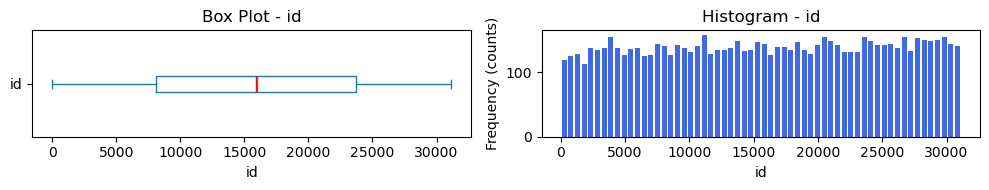

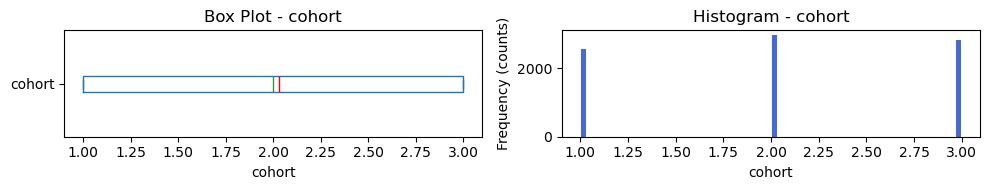

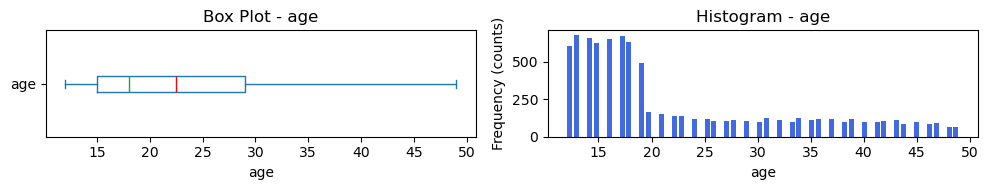

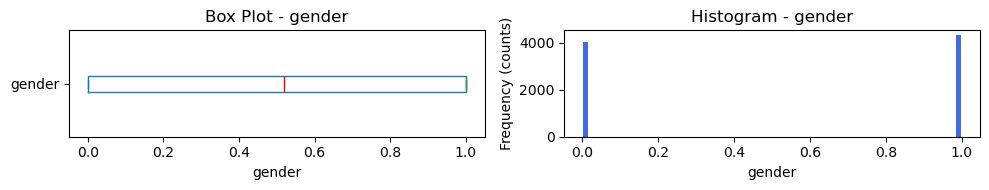

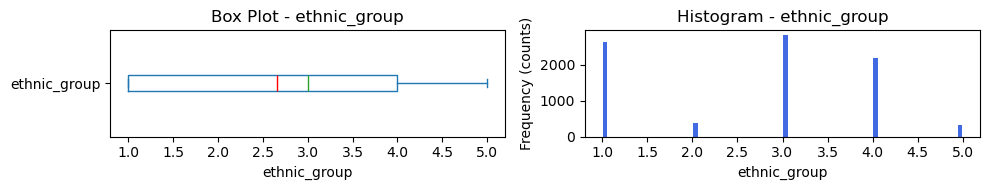

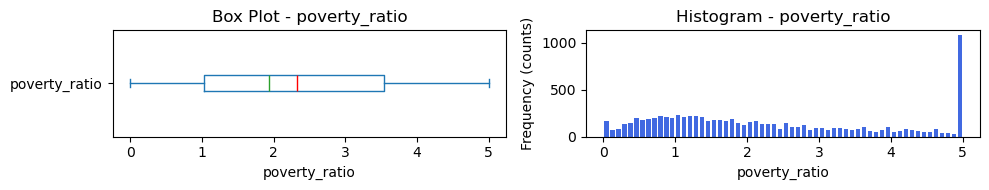

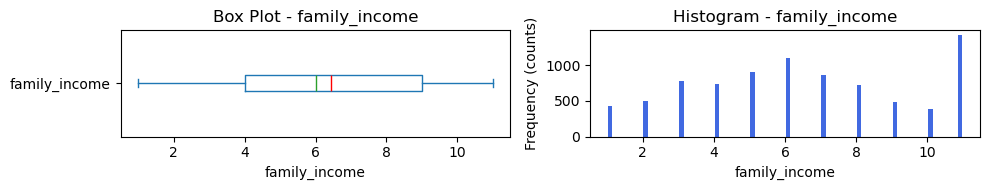

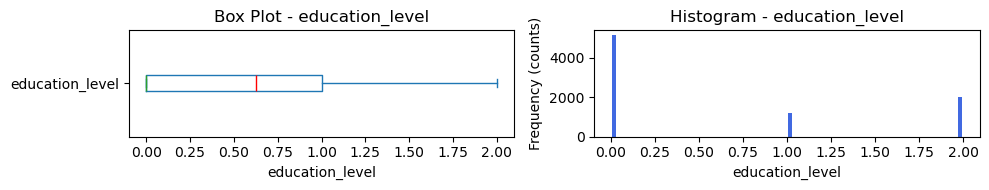

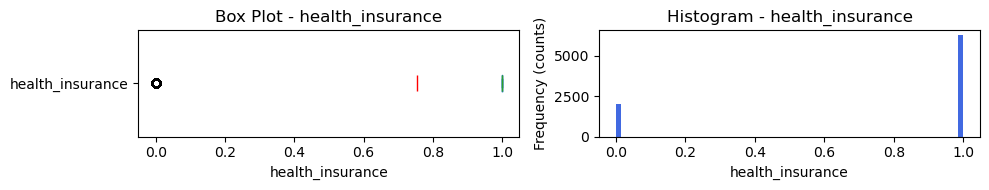

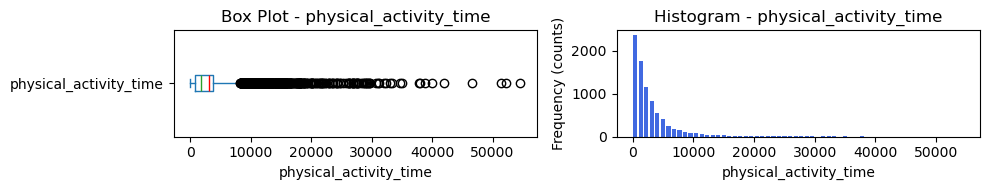

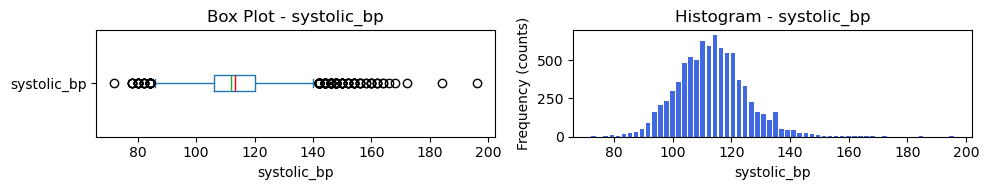

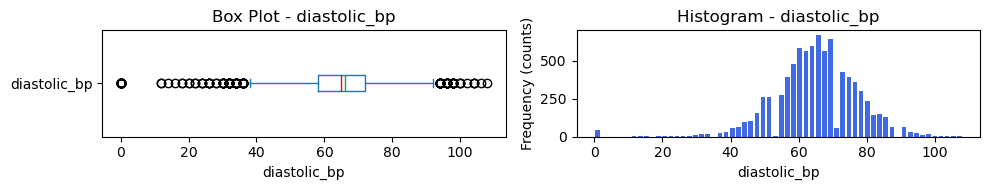

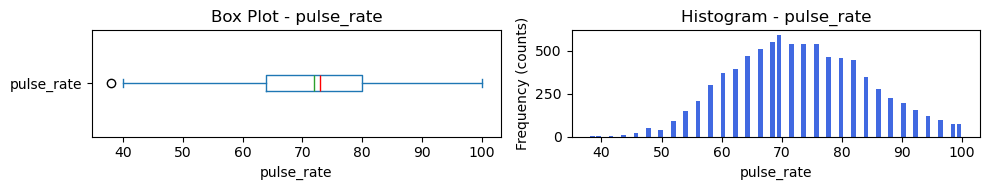

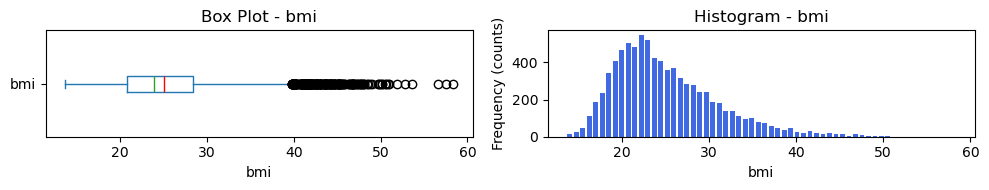

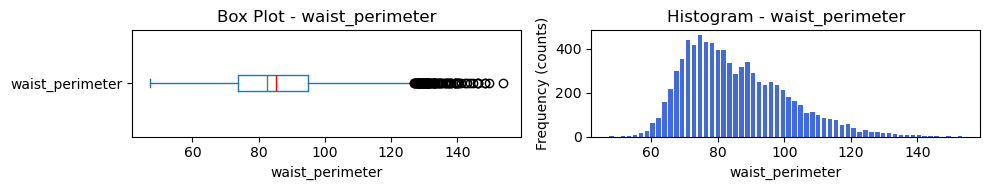

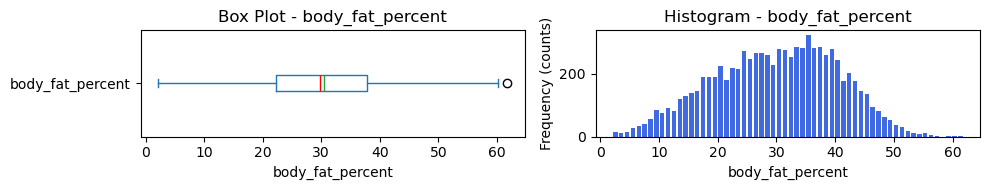

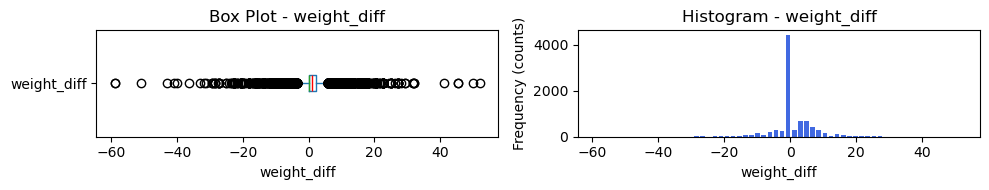

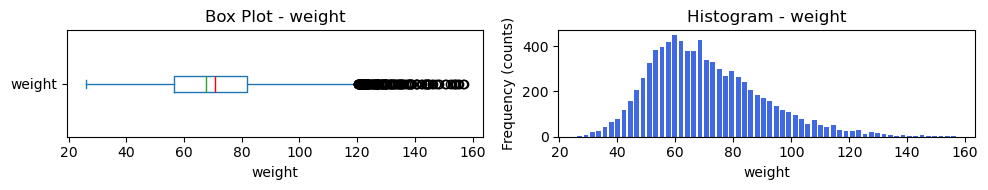

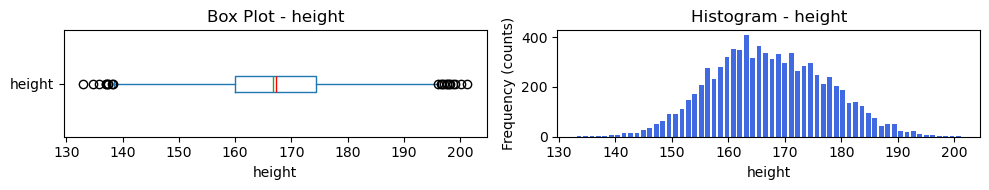

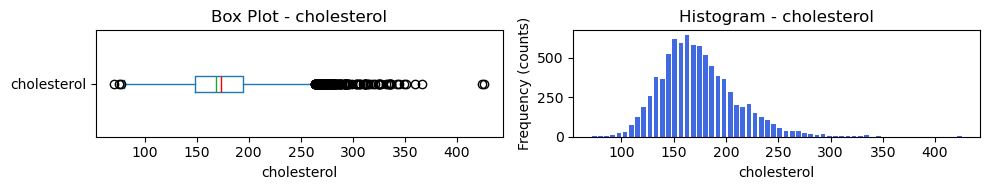

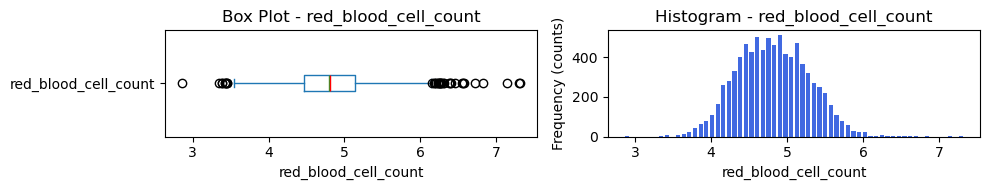

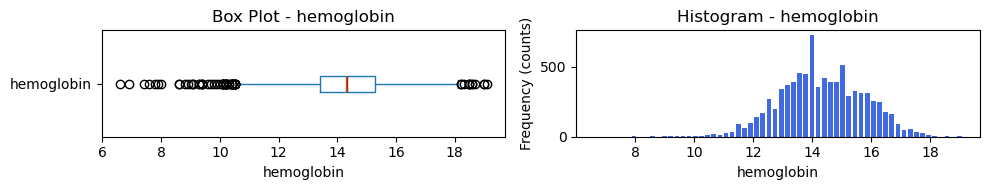

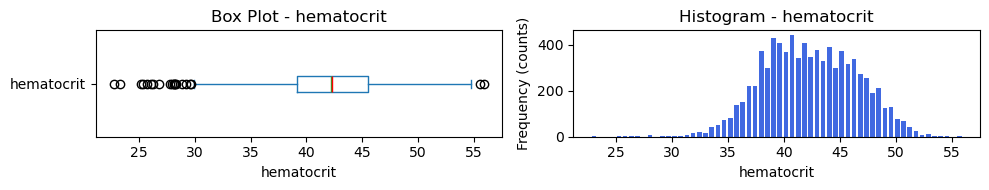

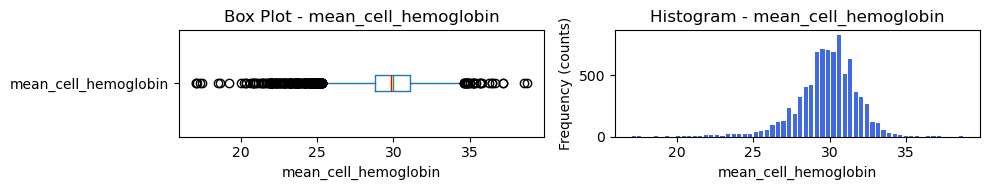

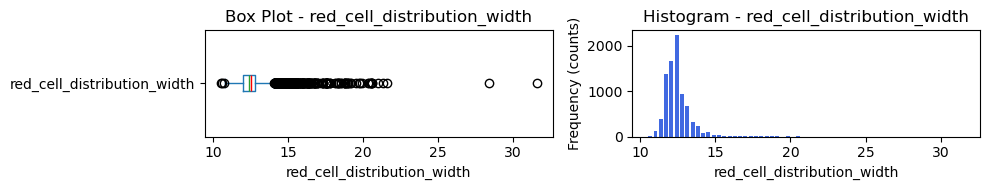

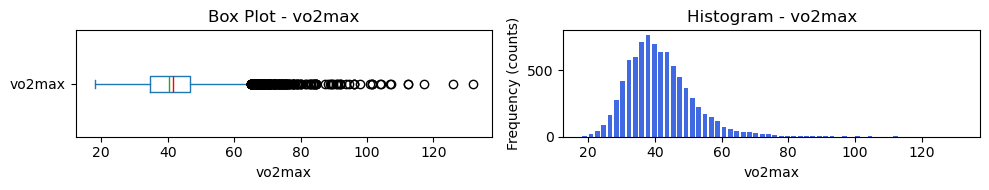

In [7]:
# Select numeric variables
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# Iterate over numeric variables
#i = 0
for variable in numeric_columns:
  # Create the figure
  fig, axes = plt.subplots(1, 2, figsize=(10, 2))

  # Plot 1 - BoxPlot
  df[variable].plot(kind='box', 
                   vert=False, 
                   showmeans=True,  # To show the mean
                   meanline=True,   # To show the mean line
                   meanprops={'color': 'red', 'linestyle': '-'}, # mean in red
                   ax=axes[0]
                    )
  axes[0].set_title(f'Box Plot - {variable}')
  axes[0].set_xlabel(variable)

  # Plot 2 - Histogram
  df[variable].plot(kind='hist',
                    bins=60,  # or bins = len(data[variable].value_counts())
                    rwidth=0.75,
                    color='royalblue',
                    ax=axes[1]
                    )
  axes[1].set_title(f'Histogram - {variable}')
  axes[1].set_xlabel(variable)
  axes[1].set_ylabel('Frequency (counts)')

  plt.tight_layout() 
  #plt.savefig(f'{i}_{variable}.png', dpi = 300)
  #i +=1
  plt.show()

#### 2.1.2. Statistical Analysis

In [8]:
eda.distribution_analysis_df(df)

variable  skewness       skewness_interpretation  \
0                            id -0.034293   Negative skew (left-tailed)   
1                        cohort -0.053791   Negative skew (left-tailed)   
2                           age  1.055482  Positive skew (right-tailed)   
3                        gender -0.071646   Negative skew (left-tailed)   
4                  ethnic_group -0.168039   Negative skew (left-tailed)   
5                 poverty_ratio  0.467745  Positive skew (right-tailed)   
6                 family_income  0.035898  Positive skew (right-tailed)   
7               education_level  0.794797  Positive skew (right-tailed)   
8              health_insurance -1.178560   Negative skew (left-tailed)   
9        physical_activity_time  3.865170  Positive skew (right-tailed)   
10                  systolic_bp  0.467102  Positive skew (right-tailed)   
11                 diastolic_bp -0.808325   Negative skew (left-tailed)   
12                   pulse_rate  0.144753  Positive skew (right-tailed)   
13                          bmi  1.082575  Positive skew (right-tailed)   
14              waist_perimeter  0.784018  Positive skew (right-tailed)   
15             body_fat_percent -0.164252   Negative skew (left-tailed)   
16                  weight_diff -0.172712   Negative skew (left-tailed)   
17                       weight  0.830100  Positive skew (right-tailed)   
18                       height  0.112414  Positive skew (right-tailed)   
19                  cholesterol  0.887262  Positive skew (right-tailed)   
20         red_blood_cell_count  0.166687  Positive skew (right-tailed)   
21                   hemoglobin -0.155960   Negative skew (left-tailed)   
22                   hematocrit -0.049396   Negative skew (left-tailed)   
23         mean_cell_hemoglobin -0.980948   Negative skew (left-tailed)   
24  red_cell_distribution_width  4.136816  Positive skew (right-tailed)   
25                       vo2max  1.421569  Positive skew (right-tailed)   

     kurtosis    kurtosis_interpretation  shapiro_wilk  \
0   -1.203046  Platykurtic (light tails)           0.0   
1   -1.445915  Platykurtic (light tails)           0.0   
2   -0.167185  Platykurtic (light tails)           0.0   
3   -1.994867  Platykurtic (light tails)           0.0   
4   -1.302859  Platykurtic (light tails)           0.0   
5   -1.060340  Platykurtic (light tails)           0.0   
6   -1.059492  Platykurtic (light tails)           0.0   
7   -1.136969  Platykurtic (light tails)           0.0   
8   -0.610997  Platykurtic (light tails)           0.0   
9   24.876823  Leptokurtic (heavy tails)           0.0   
10   1.274095  Platykurtic (light tails)           0.0   
11   3.672225  Leptokurtic (heavy tails)           0.0   
12  -0.419012  Platykurtic (light tails)           0.0   
13   1.466438  Platykurtic (light tails)           0.0   
14   0.388234  Platykurtic (light tails)           0.0   
15  -0.592768  Platykurtic (light tails)           0.0   
16  11.823981  Leptokurtic (heavy tails)           0.0   
17   0.847024  Platykurtic (light tails)           0.0   
18  -0.284065  Platykurtic (light tails)           0.0   
19   1.746818  Platykurtic (light tails)           0.0   
20   0.011558  Platykurtic (light tails)           0.0   
21   0.298141  Platykurtic (light tails)           0.0   
22  -0.230510  Platykurtic (light tails)           0.0   
23   3.270486  Leptokurtic (heavy tails)           0.0   
24  41.830918  Leptokurtic (heavy tails)           0.0   
25   5.078667  Leptokurtic (heavy tails)           0.0   

              shapiro_wilk_interpret  kolmogorov-smirnov  \
0   p < 0.05: reject H₀ (not normal)            0.000000   
1   p < 0.05: reject H₀ (not normal)            0.000000   
2   p < 0.05: reject H₀ (not normal)            0.000000   
3   p < 0.05: reject H₀ (not normal)            0.000000   
4   p < 0.05: reject H₀ (not normal)            0.000000   
5   p < 0.05: reject H₀ (not normal)            0.000000   
6   p < 0.

-------------------------
<a id = vo2max><a/>

[Go to index](#id_0)
### 2.2. Target Variable Distribution (VO2Max)


==================== Distribution Analysis for: VO2Max ====================



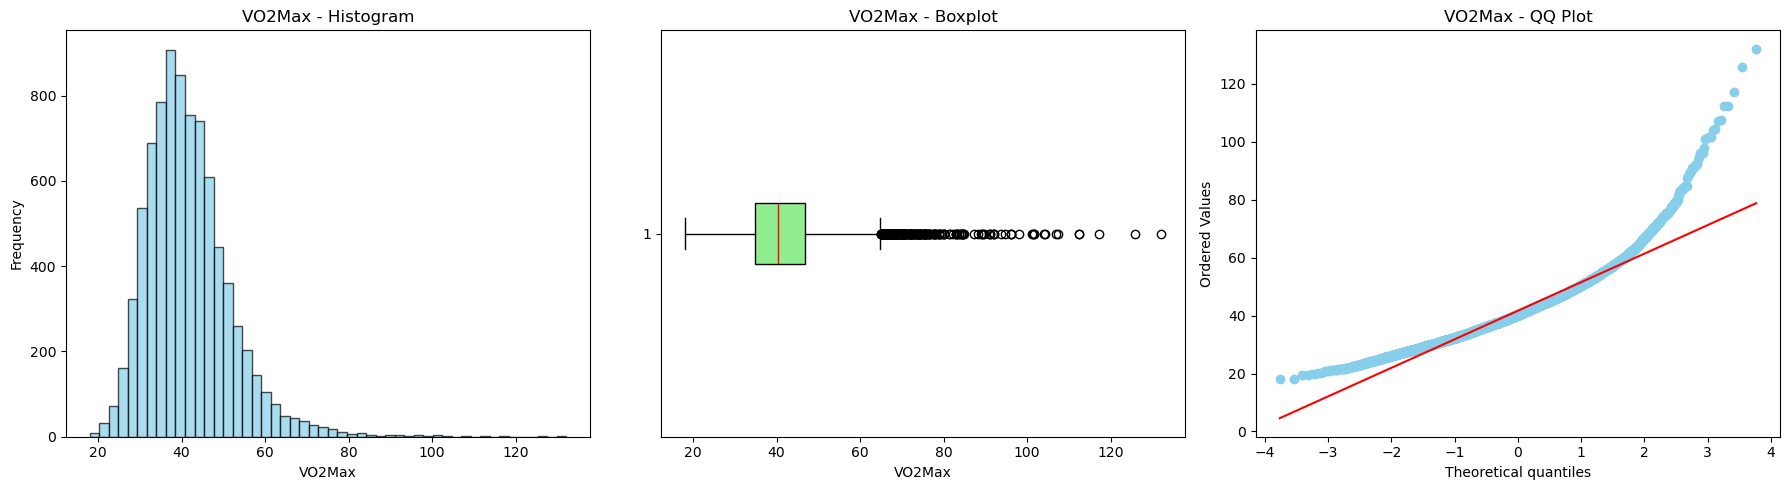

Skewness and Kurtosis:
-Skewness  : 1.42156894 -> Positive skew (right-tailed)
-Kurtosis  : 5.07866698 -> Leptokurtic (heavy tails)

Normality Tests:
Shapiro-Wilk: sample size is 8324 > 5000, using random sample of 5000.

- Shapiro-Wilk p-value      : 0.00000000 -> p < 0.05: reject H₀ (not normal)
- Kolmogorov-Smirnov p-value: 0.00000000 -> p < 0.05: reject H₀ (not normal)
- D’Agostino-Pearson p-value: 0.00000000 -> p < 0.05: reject H₀ (not normal)
Fitting Data to Distributions:
1. Fitting to common distributions:


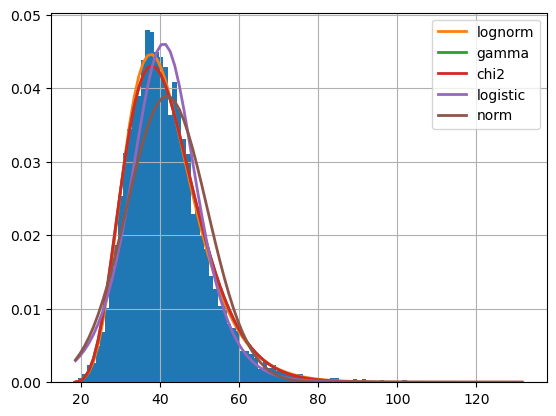

sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.000132  1596.535420  1617.616114     inf      0.016279   
gamma            0.000194  1735.778854  1756.859549     inf      0.023620   
chi2             0.000194  1735.776868  1756.857562     inf      0.023620   
logistic         0.000695  1803.115615  1817.169412     inf      0.041493   
norm             0.001386  2748.091562  2762.145358     inf      0.065256   

             ks_pvalue  
lognorm   2.399587e-02  
gamma     1.819802e-04  
chi2      1.819757e-04  
logistic  6.862713e-13  
norm      2.920082e-31


2. Fitting to all distributions (this may take some time)...


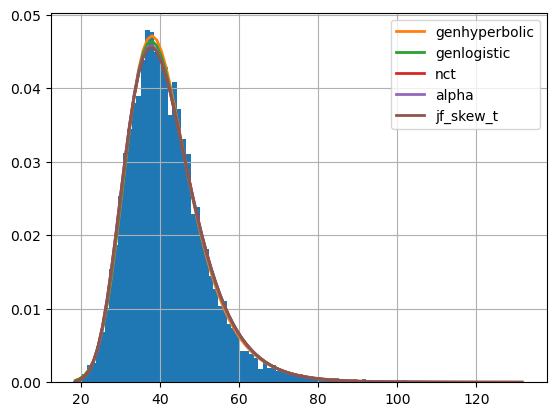

sumsquare_error          aic          bic  kl_div  \
genhyperbolic         0.000093  1472.170885  1507.305376     inf   
genlogistic           0.000094  1557.244055  1578.324749     inf   
nct                   0.000100  1529.983084  1558.090677     inf   
alpha                 0.000100  1506.047891  1527.128585     inf   
jf_skew_t             0.000101  1531.658800  1559.766393     inf   

               ks_statistic  ks_pvalue  
genhyperbolic      0.009858   0.391016  
genlogistic        0.009853   0.391707  
nct                0.011520   0.217619  
alpha              0.010561   0.308965  
jf_skew_t          0.011734   0.200310


    Information:
    - sumsquare_error: Lower means better fit to data.
    - aic (Akaike Information Criterion): Lower is better, penalizes overfitting.
    - bic (Bayesian Information Criterion): Same as AIC but stronger penalty on complexity.
    - kl_div (Kullback-Leibler divergence): Distance between true and fitted distributions, closer to 0 is better.
    - ks_statistic / ks_pvalue: Kolmogorov-Smirnov test statistic and p-value.
        


Analysis         Result  \
0                             Skewness       1.421569   
1                             Kurtosis       5.078667   
2        Normality Test - Shapiro Wilk       0.000000   
3  Normality Test - Kolmogorov-Smirnov       0.000000   
4          Normality Test - D’Agostino       0.000000   
5                    Best Fit (common)        lognorm   
6                       Best Fit (all)  genhyperbolic   

                     Interpretation  
0      Positive skew (right-tailed)  
1         Leptokurtic (heavy tails)  
2  p < 0.05: reject H₀ (not normal)  
3  p < 0.05: reject H₀ (not normal)  
4  p < 0.05: reject H₀ (not normal)  
5                                 -  
6                                 -

In [9]:
eda.distribution_analysis(df['vo2max'], 'VO2Max')

-------------------------
<a id = multivariate><a/>

[Go to index](#id_0)

### 2.3. Multivariate Relationships

<Axes: >

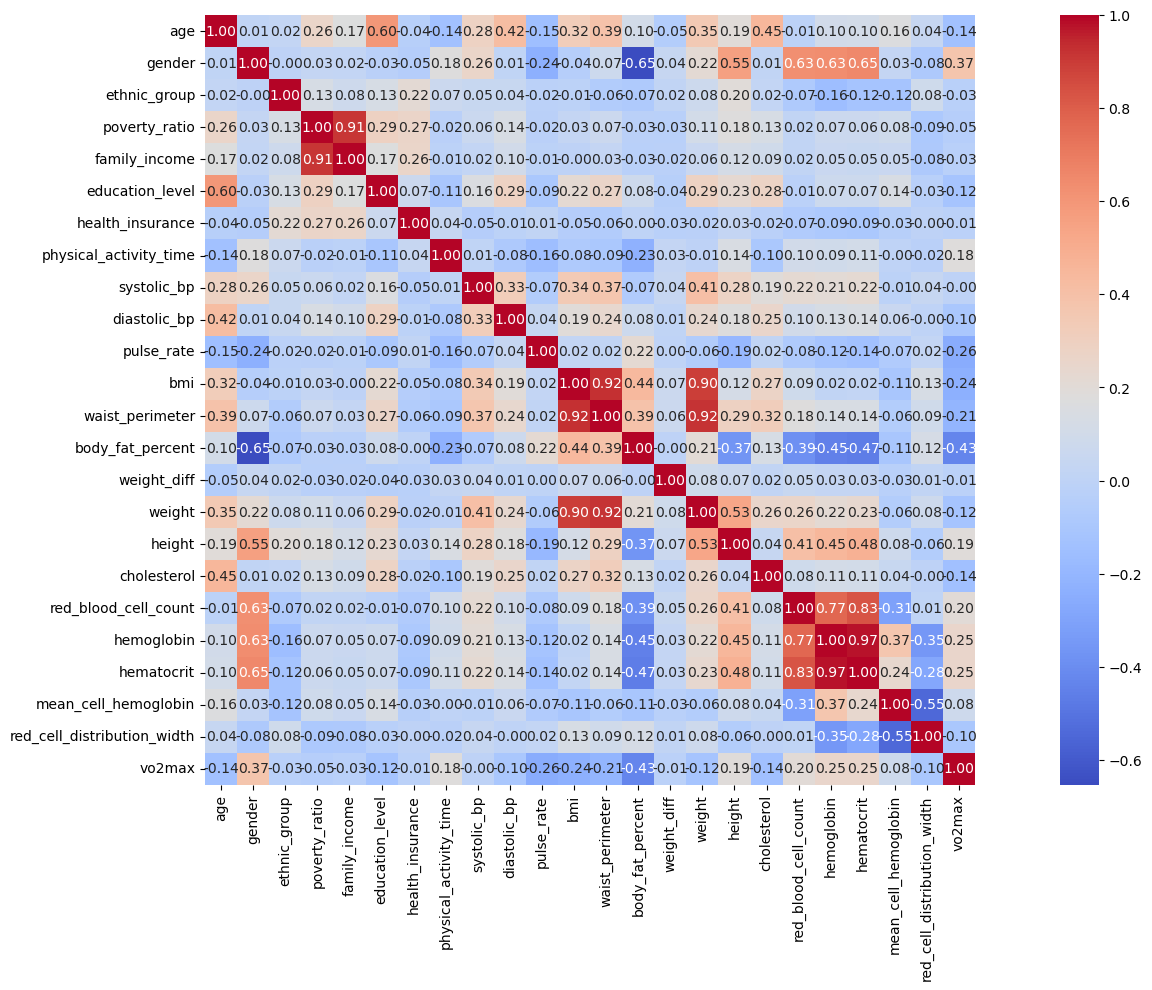

In [10]:
df_corr = df.drop(columns = ['id', 'cohort', 'smoker'], axis = 1)

corr = df_corr.corr()

plt.figure(figsize = (22,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
#plt.savefig('corr.png', dpi = 600)

-------------------------
<a id = pca><a/>

[Go to index](#id_0)

### 2.4. Linear Dimensionality Reduction (PCA)

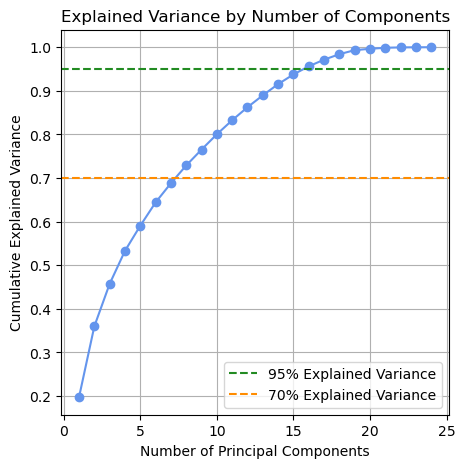

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop(['id', 'cohort'])
X = df[numeric_cols]

# 2. Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculating the cumulative explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot 
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='cornflowerblue')
ax.axhline(y=0.95, color='forestgreen', linestyle='--', label='95% Explained Variance')
ax.axhline(y=0.70, color='darkorange', linestyle='--', label='70% Explained Variance')
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Explained Variance by Number of Components")
ax.grid(True)
ax.legend()
#plt.savefig('explained_variance.png', dpi = 600)
plt.show()

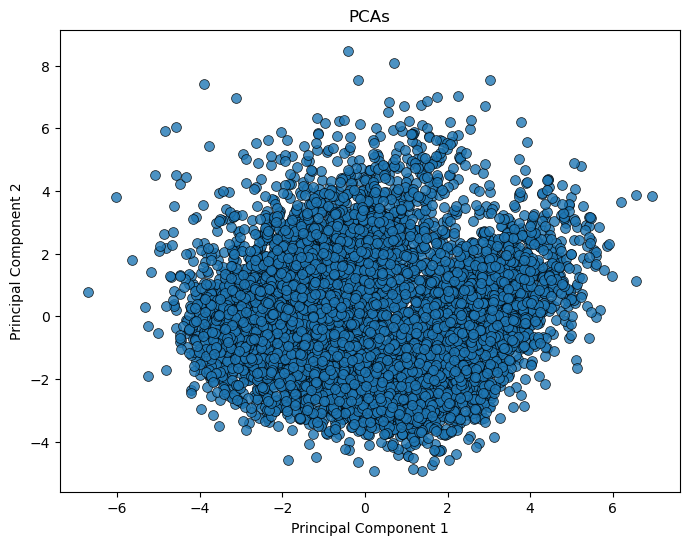

In [12]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.8, s=50, edgecolor='k')
plt.title('PCAs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#plt.savefig('pca.png', dpi = 600)
plt.show()

-------------------------
<a id = tsne><a/>

[Go to index](#id_0)

### 2.5. Non-linear Dimensionality Reduction (t-SNE)

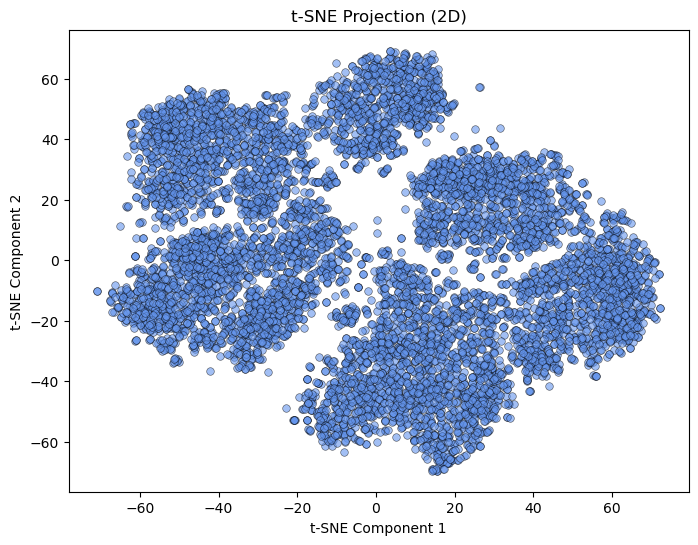

In [13]:
from sklearn.manifold import TSNE

# Store X_scaled in a DataFrame with the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], alpha=0.6, s=30, color="cornflowerblue", edgecolor='k')
plt.title("t-SNE Projection (2D)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
#plt.savefig('tnse.png', dpi = 600)
plt.show()

-------------------------
<a id = clustering><a/>

[Go to index](#id_0)

### 2.6. Clustering Analysis (DBSCAN)

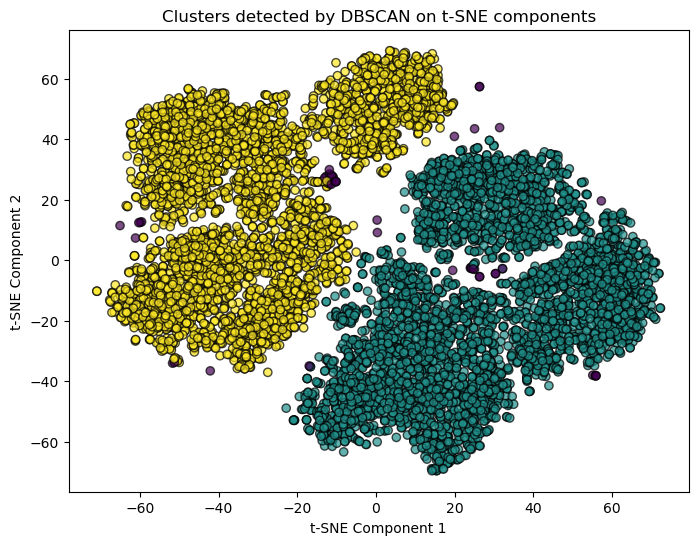

In [14]:
from sklearn.cluster import DBSCAN

# 1. Apply DBSCAN
dbscan = DBSCAN(eps=6, min_samples=50)  # You can adjust the 'eps' and 'min_samples' parameters as needed
labels_dbscan = dbscan.fit_predict(X_tsne)

# 2. Visualization 
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_dbscan, cmap="viridis", edgecolors="k", alpha=0.7)
plt.title("Clusters detected by DBSCAN on t-SNE components")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

#plt.savefig('dbscan.png', dpi = 300)
plt.show()

Legend:
- Cluster 0 = blue
- Cluster 1 = cyan blue
- Cluster 2 = green
- Cluster 3 = yellow
- Cluster -1 =  purple (no cluster)

In [15]:
# DataFrame with the cluster labels
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
df_tsne['Cluster'] = labels_dbscan

df_with_labels = X_scaled_df.copy()  # Create a copy of the original DataFrame
df_with_labels['Cluster'] = labels_dbscan

# Examine mean feature values by cluster
cluster_means = df_with_labels.groupby('Cluster').mean()
cluster_means

age    gender  ethnic_group  poverty_ratio  family_income  \
Cluster                                                                   
-1       0.470390  0.055144      0.140214      -0.181242      -0.190645   
 0      -0.002014  0.949488     -0.004263       0.028089       0.021765   
 1      -0.003026 -1.030418      0.003071      -0.028458      -0.021494   

         education_level  health_insurance  physical_activity_time  \
Cluster                                                              
-1              0.361050         -0.325482                0.968291   
 0             -0.026983         -0.044489                0.189240   
 1              0.025266          0.051858               -0.215974   

         systolic_bp  diastolic_bp  ...  weight_diff    weight    height  \
Cluster                             ...                                    
-1          0.107498     -0.040344  ...    -2.016823  0.453567 -0.211110   
 0          0.241985     -0.003929  ...     0.042080  0.207503  0.533455   
 1         -0.263646      0.004709  ...    -0.023298 -0.230080 -0.576243   

         cholesterol  red_blood_cell_count  hemoglobin  hematocrit  \
Cluster                                                              
-1          0.072790              0.070518   -0.264596   -0.215603   
 0          0.007637              0.600517    0.610605    0.629210   
 1         -0.009090             -0.652097   -0.659327   -0.680048   

         mean_cell_hemoglobin  red_cell_distribution_width    vo2max  
Cluster                                                               
-1                  -0.194313                     0.400723  0.110223  
 0                   0.031264                    -0.097235  0.362356  
 1                  -0.031756                     0.101021 -0.394230  

[3 rows x 24 columns]

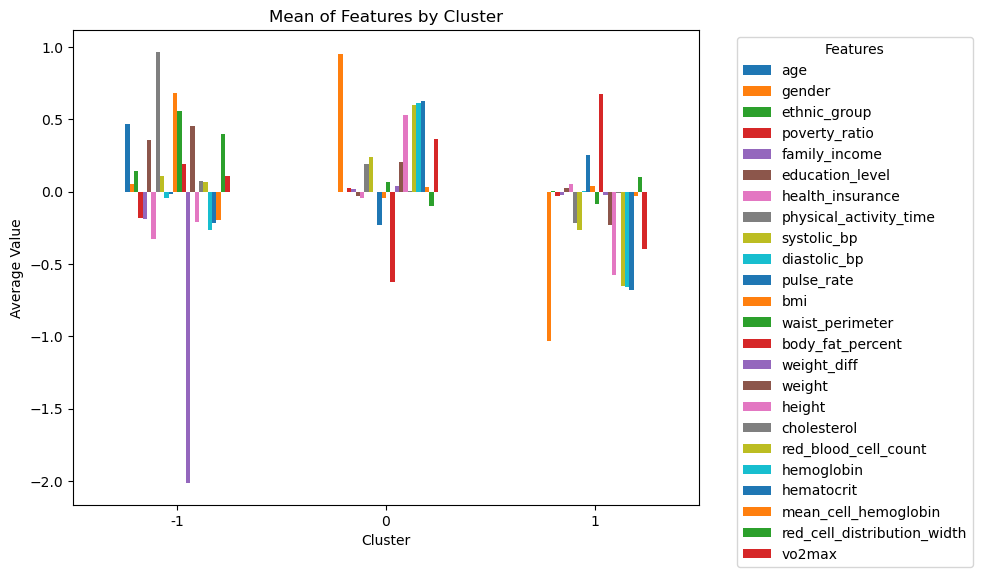

In [16]:
import matplotlib.pyplot as plt

# Filter numeric columns, excluding 'Cluster'
numeric_columns = df_with_labels.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Cluster', errors='ignore')  # Exclude 'Cluster' if present

# Get mean values per cluster for numeric columns
cluster_means = df_with_labels.groupby('Cluster')[numeric_columns].mean()

# Plot mean values by cluster
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean of Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig('features_DBSCAN.png', dpi = 300)
plt.show()

In [17]:
# Variable Correlation to t-SNE components
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE_1', 'tSNE_2'])
tsne_df = pd.concat([tsne_df, X_scaled_df], axis=1)
correlations = tsne_df.corr().loc[['tSNE_1', 'tSNE_2']].drop(['tSNE_1', 'tSNE_2'], axis=1)
correlations = correlations.T.sort_values(by=['tSNE_1'], ascending=False)  # Ordenar por tSNE_1 o tSNE_2
correlations.head(10)

tSNE_1    tSNE_2
gender                0.793532 -0.524234
hematocrit            0.634633 -0.264405
hemoglobin            0.612438 -0.251423
red_blood_cell_count  0.593054 -0.289695
height                0.563503 -0.239799
weight                0.433608  0.172978
systolic_bp           0.340627  0.052480
waist_perimeter       0.336522  0.302266
vo2max                0.250830 -0.339934
age                   0.213910  0.382378

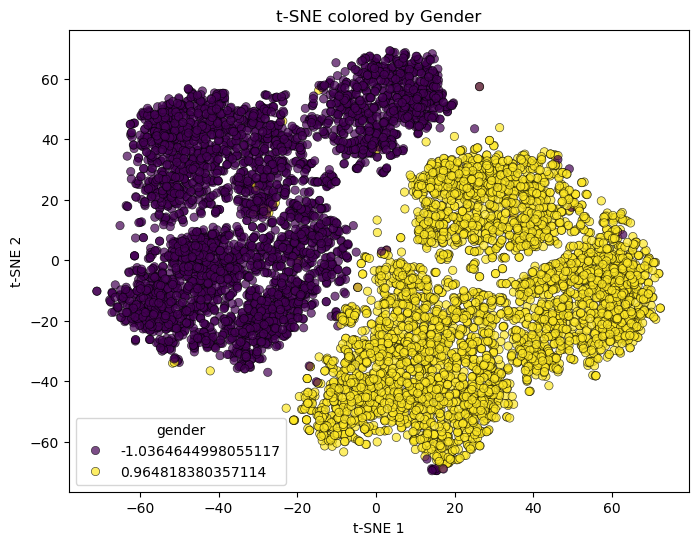

In [18]:
# t-SNE colored by Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X_scaled_df['gender'], palette='viridis', edgecolor='k', alpha=0.7)
plt.title('t-SNE colored by Gender')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
#plt.savefig('gender_DBSCAN.png', dpi = 300)
plt.show()

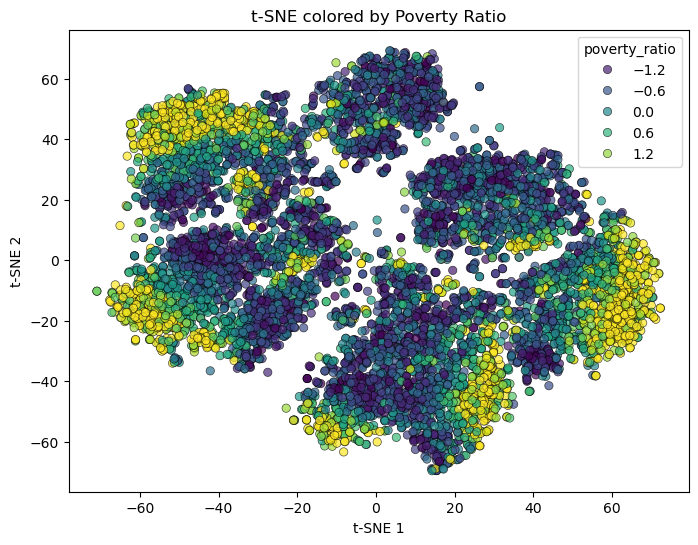

In [19]:
# t-SNE colored by Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X_scaled_df['poverty_ratio'], palette='viridis', edgecolor='k', alpha=0.7)
plt.title('t-SNE colored by Poverty Ratio')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
#plt.savefig('poverty_DBSCAN.png', dpi = 300)
plt.show()

-------------------------
<a id = prepro><a/>

[Go to index](#id_0)

## 3. Data Pre-processing
<a id = useless><a/>
### 3.1. Removing Useless Variables

In [20]:
df = df.drop(columns = ['id', 'cohort'], axis = 1)

<a id = ohe><a/>
### 3.2. One-Hot Encoding of Categorical Variables

In [21]:
df = pd.get_dummies(df,
                      columns = ['ethnic_group','smoker'],
                      dtype= float
                     )
df = df.rename({
    'ethnic_group_1.0': 'ethnic_mexican',
    'ethnic_group_2.0': 'ethnic_hispanic',
    'ethnic_group_3.0': 'ethnic_white',
    'ethnic_group_4.0': 'ethnic_black',
    'ethnic_group_5.0': 'ethnic_other'
}, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8324 entries, 0 to 8323
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          8324 non-null   float64
 1   gender                       8324 non-null   float64
 2   poverty_ratio                8324 non-null   float64
 3   family_income                8324 non-null   int64  
 4   education_level              8324 non-null   int64  
 5   health_insurance             8324 non-null   int64  
 6   physical_activity_time       8324 non-null   float64
 7   systolic_bp                  8324 non-null   float64
 8   diastolic_bp                 8324 non-null   float64
 9   pulse_rate                   8324 non-null   float64
 10  bmi                          8324 non-null   float64
 11  waist_perimeter              8324 non-null   float64
 12  body_fat_percent             8324 non-null   float64
 13  weight_diff       

In [22]:
etl.descriptors(df)

count         mean          std           min  \
age                          8324.0    22.456151    10.385105  1.200000e+01   
gender                       8324.0     0.517900     0.499710  0.000000e+00   
poverty_ratio                8324.0     2.320385     1.559402  5.397605e-79   
family_income                8324.0     6.423715     3.057198  1.000000e+00   
education_level              8324.0     0.626141     0.846685  0.000000e+00   
health_insurance             8324.0     0.753844     0.430796  0.000000e+00   
physical_activity_time       8324.0  3078.455286  3970.569434  0.000000e+00   
systolic_bp                  8324.0   113.101442    11.488572  7.200000e+01   
diastolic_bp                 8324.0    64.845699    12.174794  5.397605e-79   
pulse_rate                   8324.0    72.960356    11.115803  3.800000e+01   
bmi                          8324.0    25.098640     5.977764  1.370000e+01   
waist_perimeter              8324.0    85.355031    15.246146  4.710000e+01   
body_fat_percent             8324.0    29.826461    10.488997  2.100000e+00   
weight_diff                  8324.0     1.091914     5.694107 -5.896708e+01   
weight                       8324.0    70.663667    19.568241  2.590000e+01   
height                       8324.0   167.203532    10.169326  1.330000e+02   
cholesterol                  8324.0   173.602235    36.565055  7.100000e+01   
red_blood_cell_count         8324.0     4.809916     0.468538  2.860000e+00   
hemoglobin                   8324.0    14.320106     1.424614  6.600000e+00   
hematocrit                   8324.0    42.308340     4.158459  2.280000e+01   
mean_cell_hemoglobin         8324.0    29.823606     1.969606  1.700000e+01   
red_cell_distribution_width  8324.0    12.508554     0.958759  1.050000e+01   
vo2max                       8324.0    41.668194    10.242108  1.799000e+01   
ethnic_mexican               8324.0     0.316194     0.465018  0.000000e+00   
ethnic_hispanic              8324.0     0.043849     0.204772  0.000000e+00   
ethnic_white                 8324.0     0.338299     0.473159  0.000000e+00   
ethnic_black                 8324.0     0.264056     0.440856  0.000000e+00   
ethnic_other                 8324.0     0.037602     0.190243  0.000000e+00   
smoker_former                8324.0     0.242912     0.428868  0.000000e+00   
smoker_no                    8324.0     0.550817     0.497441  0.000000e+00   
smoker_yes                   8324.0     0.206271     0.404652  0.000000e+00   

                                 25%       50%          75%           max  \
age                           15.000    18.000    29.000000     49.000000   
gender                         0.000     1.000     1.000000      1.000000   
poverty_ratio                  1.020     1.940     3.540000      5.000000   
family_income                  4.000     6.000     9.000000     11.000000   
education_level                0.000     0.000     1.000000      2.000000   
health_insurance               1.000     1.000     1.000000      1.000000   
physical_activity_time       780.000  1846.000  3780.000000  54600.000000   
systolic_bp                  106.000   112.000   120.000000    196.000000   
diastolic_bp                  58.000    66.000    72.000000    108.000000   
pulse_rate                    64.000    72.000    80.000000    100.000000   
bmi                           20.750    23.860    28.350000     58.360000   
waist_perimeter               73.700    82.500    95.000000    153.700000   
body_fat_percent              22.195    30.500    37.800000     61.800000   
weight_diff                    0.000     0.000     2.267965     52.163185   
weight                        56.600    67.600    82.000000    157.100000   
height                       160.000   166.700   174.400000    201.300000   
cholesterol                  148.000   169.000   194.000000    426.000000   
red_blood_cell_count           4.470     4.800     5.140000      7.320000   
hemoglobin                    13.400  

-------------------------
<a id = normalization><a/>

[Go to index](#id_0)

### 3.3. Feature Transformation and Normalization

In [23]:
from sklearn.preprocessing import StandardScaler

columnas = ['age', 'family_income', 'education_level', 'poverty_ratio', 'physical_activity_time',
       'systolic_bp', 'diastolic_bp', 'pulse_rate', 'bmi', 'waist_perimeter', 'body_fat_percent',
       'weight', 'height', 'cholesterol', 'weight_diff','red_blood_cell_count','hemoglobin','hematocrit','mean_cell_hemoglobin','red_cell_distribution_width',  'vo2max']

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[columnas] = pd.DataFrame(scaler.fit_transform(df[columnas]), columns =columnas)

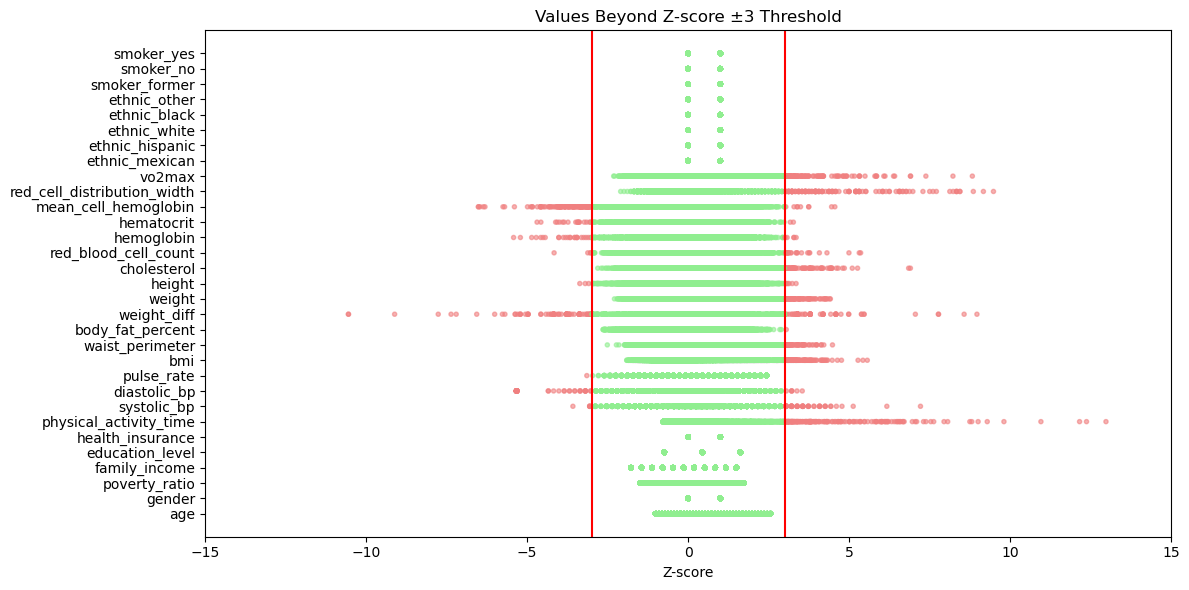

In [24]:
plt.figure(figsize=(12, 6)) 


for i, col in enumerate(df_scaled.columns):
    values = df_scaled[col]
    
    # Assign a color based on whether the standardized value is within ±3
    colors = ['lightgreen' if -3 <= val <= 3 else 'lightcoral' for val in values]
    
    # Use scatter plot to display each value, coloring individually
    plt.scatter(values, [i]*len(values), color=colors, alpha=0.6, marker='.')

# Formatting
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xlim(-15, 15)
plt.axvline(-3, color='red', linestyle='-')
plt.axvline(3, color='red', linestyle='-')
plt.title("Values Beyond Z-score ±3 Threshold")
plt.xlabel("Z-score")

plt.tight_layout()
#plt.savefig('zscore_1.png', dpi = 400)
plt.show() 

**FEATURE TRANSFORMATION**

In [25]:
# Assuming your DataFrame is named df
df_2 = df.copy()  # Create a copy to avoid modifying the original

# Logarithmic transformations (log1p used for variables that may contain zeros)
df_2['physical_activity_time'] = np.log1p(df['physical_activity_time'])
df_2['poverty_ratio'] = np.log1p(df['poverty_ratio'])

# Standard logarithmic transformations
df_2['bmi'] = np.log(df['bmi'])
df_2['waist_perimeter'] = np.log(df['waist_perimeter'])
df_2['weight'] = np.log(df['weight'])
df_2['cholesterol'] = np.log(df['cholesterol'])
df_2['vo2max'] = np.log(df['vo2max'])

# Symmetric square root transformation for variables with both positive and negative values
df_2['weight_diff'] = np.sign(df['weight_diff']) * np.sqrt(np.abs(df['weight_diff']))

In [26]:
columnas = ['age', 'family_income', 'education_level', 'poverty_ratio', 'physical_activity_time',
       'systolic_bp', 'diastolic_bp', 'pulse_rate', 'bmi', 'waist_perimeter', 'body_fat_percent',
       'weight', 'height', 'cholesterol', 'weight_diff','red_blood_cell_count','hemoglobin','hematocrit','mean_cell_hemoglobin','red_cell_distribution_width',  'vo2max']

scaler = StandardScaler()

df_scaled_2 = df_2.copy()
df_scaled_2[columnas] = pd.DataFrame(scaler.fit_transform(df_2[columnas]), columns =columnas)

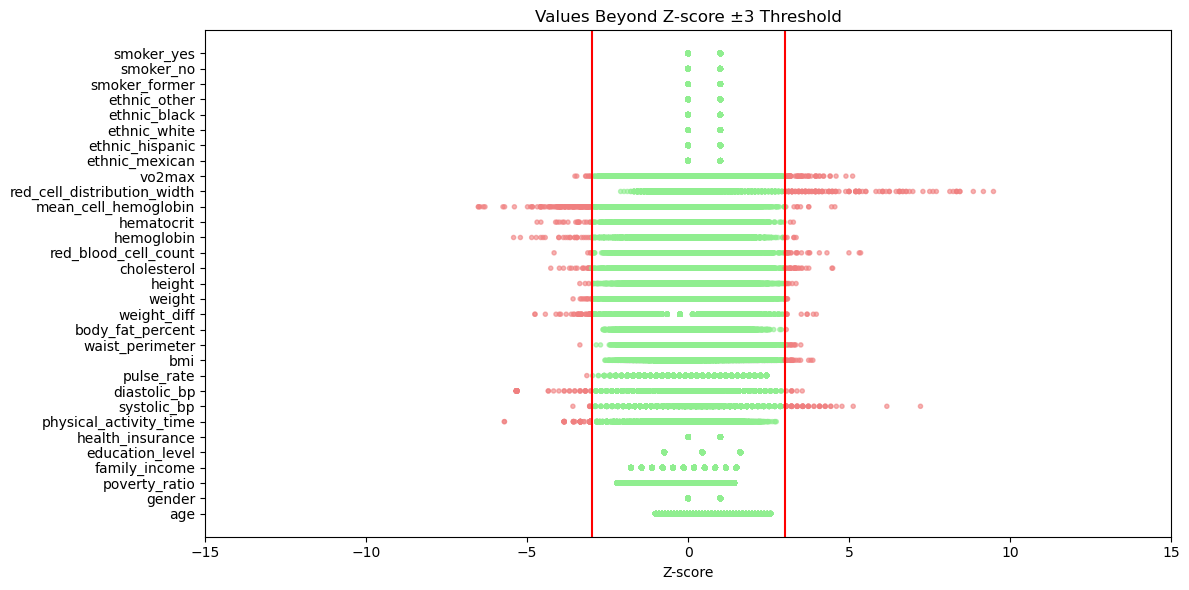

In [27]:
plt.figure(figsize=(12, 6)) 


for i, col in enumerate(df_scaled_2.columns):
    values = df_scaled_2[col]
    
    # Assign a color based on whether the standardized value is within ±3
    colors = ['lightgreen' if -3 <= val <= 3 else 'lightcoral' for val in values]
    
    # Use scatter plot to display each value, coloring individually
    plt.scatter(values, [i]*len(values), color=colors, alpha=0.6, marker='.')

# Formatting
plt.yticks(range(len(df_scaled_2.columns)), df_scaled_2.columns)
plt.xlim(-15, 15)
plt.axvline(-3, color='red', linestyle='-')
plt.axvline(3, color='red', linestyle='-')
plt.title("Values Beyond Z-score ±3 Threshold")
plt.xlabel("Z-score")

plt.tight_layout()
#plt.savefig('zscore_2.png', dpi = 400)
plt.show() 

In [28]:
df_scaled_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8324 entries, 0 to 8323
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          8324 non-null   float64
 1   gender                       8324 non-null   float64
 2   poverty_ratio                8324 non-null   float64
 3   family_income                8324 non-null   float64
 4   education_level              8324 non-null   float64
 5   health_insurance             8324 non-null   int64  
 6   physical_activity_time       8324 non-null   float64
 7   systolic_bp                  8324 non-null   float64
 8   diastolic_bp                 8324 non-null   float64
 9   pulse_rate                   8324 non-null   float64
 10  bmi                          8324 non-null   float64
 11  waist_perimeter              8324 non-null   float64
 12  body_fat_percent             8324 non-null   float64
 13  weight_diff       

-------------------------
<a id = saving><a/>

[Go to index](#id_0)

## 4. Saving the Dataset into the Data Warehouse

In this sub-project, the dataset has been transformed and is ready for implementing Machine Learning algorithms. To store it and use it in future projects, the dataset has been saved in the PostgreSQL Data Warehouse that was created in the first sub-project. It has been stored in the table called `biometrics_ml`:

In [29]:
import psycopg2

# This earch for the nearest .env upwards in the folder tree
load_dotenv(find_dotenv())

# Retreive your credentials
user=os.getenv("DB_USER")
password=os.getenv("DB_PASSWORD")
host=os.getenv("DB_HOST")
port=os.getenv("DB_PORT")
database=os.getenv("DB_NAME")

# Establish the connection to the PostgreSQL database
connection = psycopg2.connect(
    user=user,
    password=password,
    host=host,
    port=port,
    database=database
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [30]:
# SQL query to create the 'biometrics_ml' table if it doesn't already exist
create_table_sql = """
    CREATE TABLE IF NOT EXISTS biometrics_ml (
    age                     FLOAT,
    gender                  FLOAT,
    education_level         FLOAT,
    poverty_ratio           FLOAT,
    family_income           FLOAT,
    health_insurance        INTEGER,
    physical_activity_time  FLOAT,
    systolic_bp             FLOAT,
    diastolic_bp            FLOAT,
    pulse_rate              FLOAT,
    bmi                     FLOAT,
    waist_perimeter         FLOAT,
    body_fat_percent        FLOAT,
    weight                  FLOAT,
    height                  FLOAT,
    cholesterol             FLOAT,
    weight_diff             FLOAT,
    red_blood_cell_count    FLOAT,
    hemoglobin              FLOAT,
    hematocrit              FLOAT,
    mean_cell_hemoglobin    FLOAT,
    red_cell_distribution_width FLOAT,
    vo2max                  FLOAT,
    ethnic_mexican          FLOAT,
    ethnic_hispanic         FLOAT,
    ethnic_white            FLOAT,
    ethnic_black            FLOAT,
    ethnic_other            FLOAT,
    smoker_former           FLOAT,
    smoker_no               FLOAT,
    smoker_yes              FLOAT
);
"""

# Execute the SQL query to create the table
cursor.execute(create_table_sql)
connection.commit()

In [31]:
# Convert your dataframe to list of tuples for insertion
data = df_scaled_2.values.tolist()

# SQL query to insert data into 'biometrics_ml' table
insert_sql = """
    INSERT INTO biometrics_ml (
        age, gender, education_level, poverty_ratio, family_income,
        health_insurance, physical_activity_time, systolic_bp, diastolic_bp,
        pulse_rate, bmi, waist_perimeter, body_fat_percent, weight, height, cholesterol,
        weight_diff, red_blood_cell_count, hemoglobin, hematocrit,
        mean_cell_hemoglobin, red_cell_distribution_width, vo2max,
        ethnic_mexican, ethnic_hispanic, ethnic_white, ethnic_black, ethnic_other,
        smoker_former, smoker_no, smoker_yes
    ) VALUES %s
"""
from psycopg2.extras import execute_values

# Insert all rows at once
execute_values(cursor, insert_sql, data)
connection.commit()

print(f"{len(data)} rows inserted into the 'biometrics_ml' table.")

8324 rows inserted into the 'biometrics_ml' table.


In [32]:
connection.close()